**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

* NOMBRE: Carlos Alejandro Herrera Legaspi, MATRÍCULA: A01751709
* NOMBRE: Hesus García Cobos, MATRÍCULA: A01129778
* NOMBRE: Rafael Mandujano Núñez, MATRÍCULA: A00824644
* NOMBRE: Omar Aguilar Macedo, MATRÍCULA: A01797078

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
DIR = "/content/drive/MyDrive/TC4029/actividades/09"
os.chdir(DIR)

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score, precision_score, f1_score

In [133]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [134]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [135]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [136]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [137]:
data_df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [138]:
data_df.nunique()

,0
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


1c) Búsqueda de valores faltantes.

In [139]:
data_df.isna().sum()
# no hay valores faltantes

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

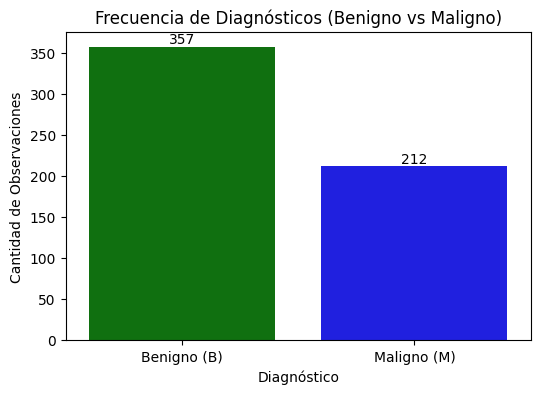

In [140]:
plt.figure(figsize=(6,4))
ax = sns.countplot(
    data = data_df,
    x = 'diagnosis',
    hue = 'diagnosis',
    palette=['blue', 'green'],
    order=data_df['diagnosis'].value_counts().index
)

for bar in ax.patches:
    plt.text(
      bar.get_x() + bar.get_width()/2,
      bar.get_height(),
      int(bar.get_height()),
      horizontalalignment='center',
      verticalalignment='bottom'
    )

plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad de Observaciones")
plt.title("Frecuencia de Diagnósticos (Benigno vs Maligno)")
plt.xticks(ticks=[0,1], labels=['Benigno (B)', 'Maligno (M)'])
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

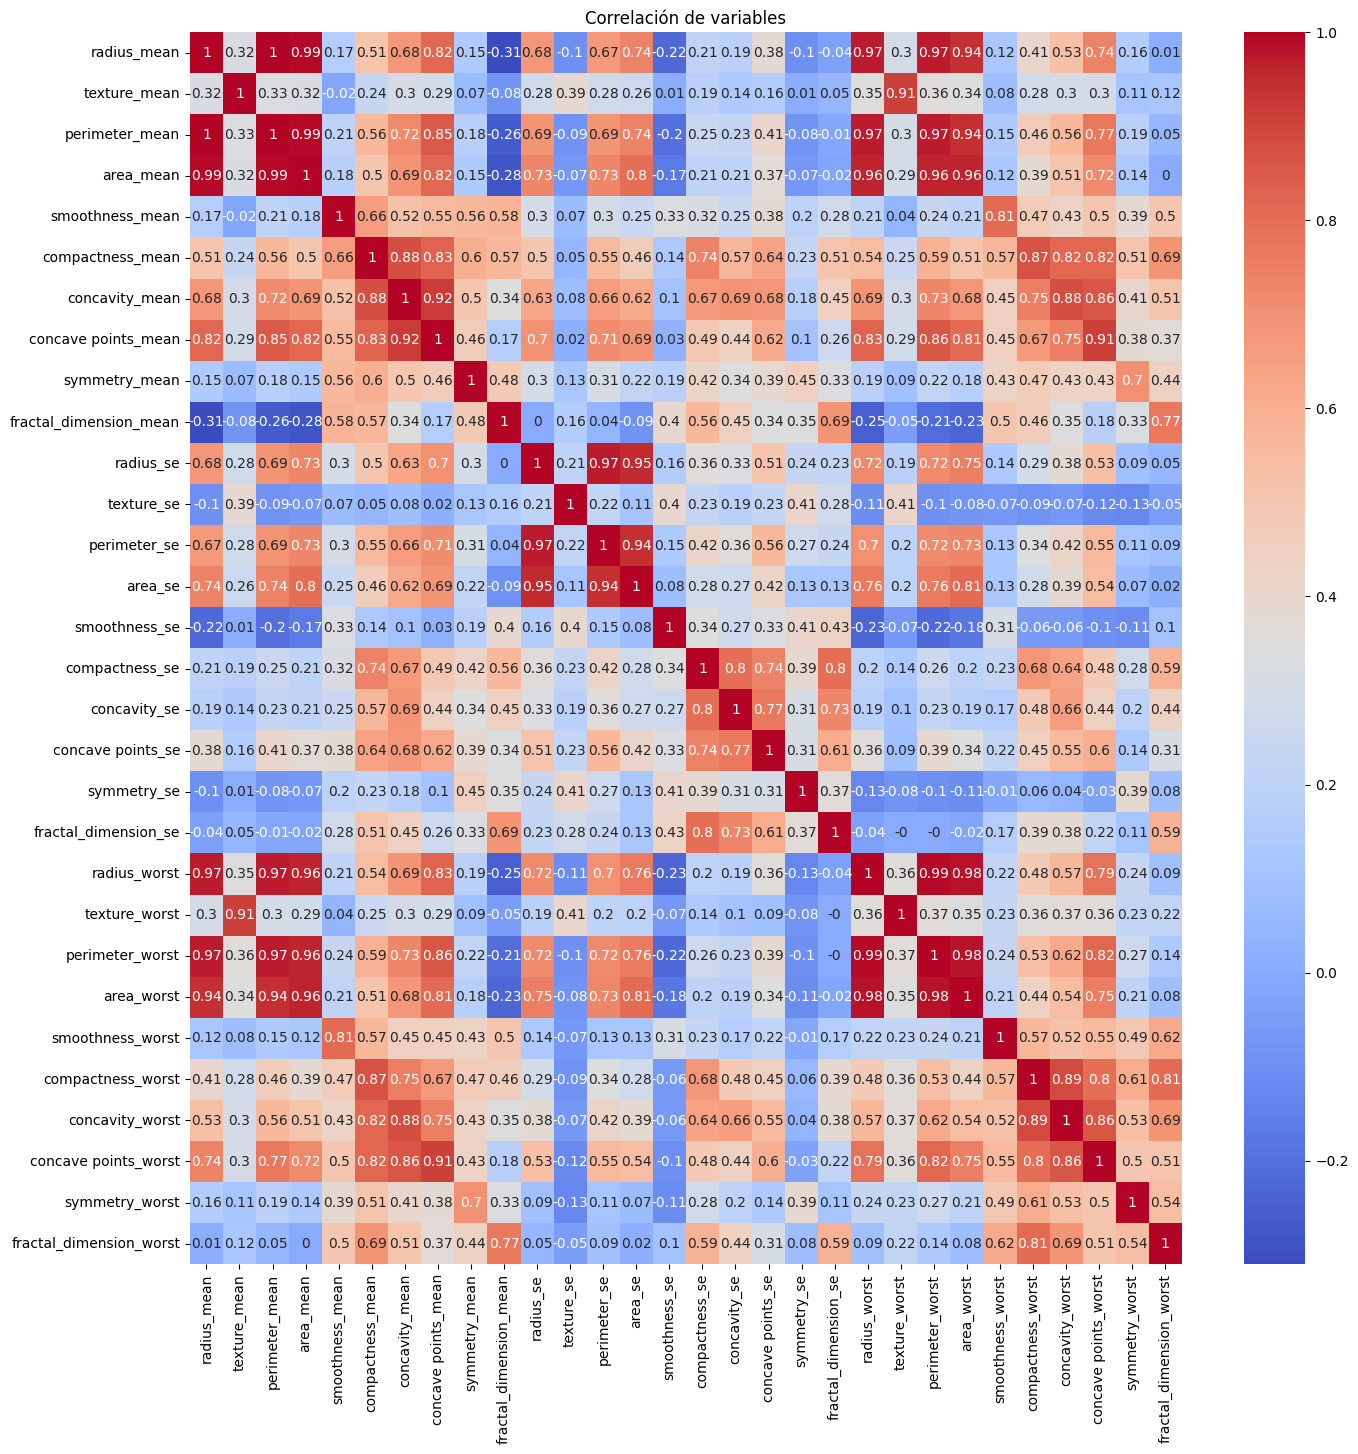

In [141]:
corr_mat = data_df.corr(numeric_only = True)
plt.figure(figsize=(16, 16))
sns.heatmap(round(corr_mat, 2), annot = True, cmap = 'coolwarm')
plt.title('Correlación de variables')
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

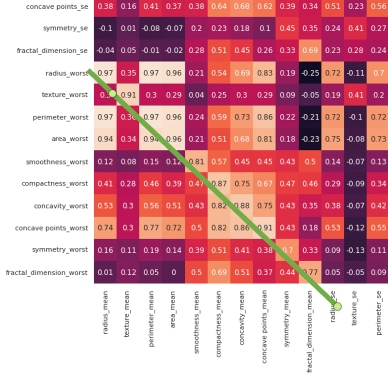

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [142]:
columns = data_df.columns
BM = columns.str.endswith('_worst')
data_df.drop(columns=columns[BM], inplace=True)
data_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




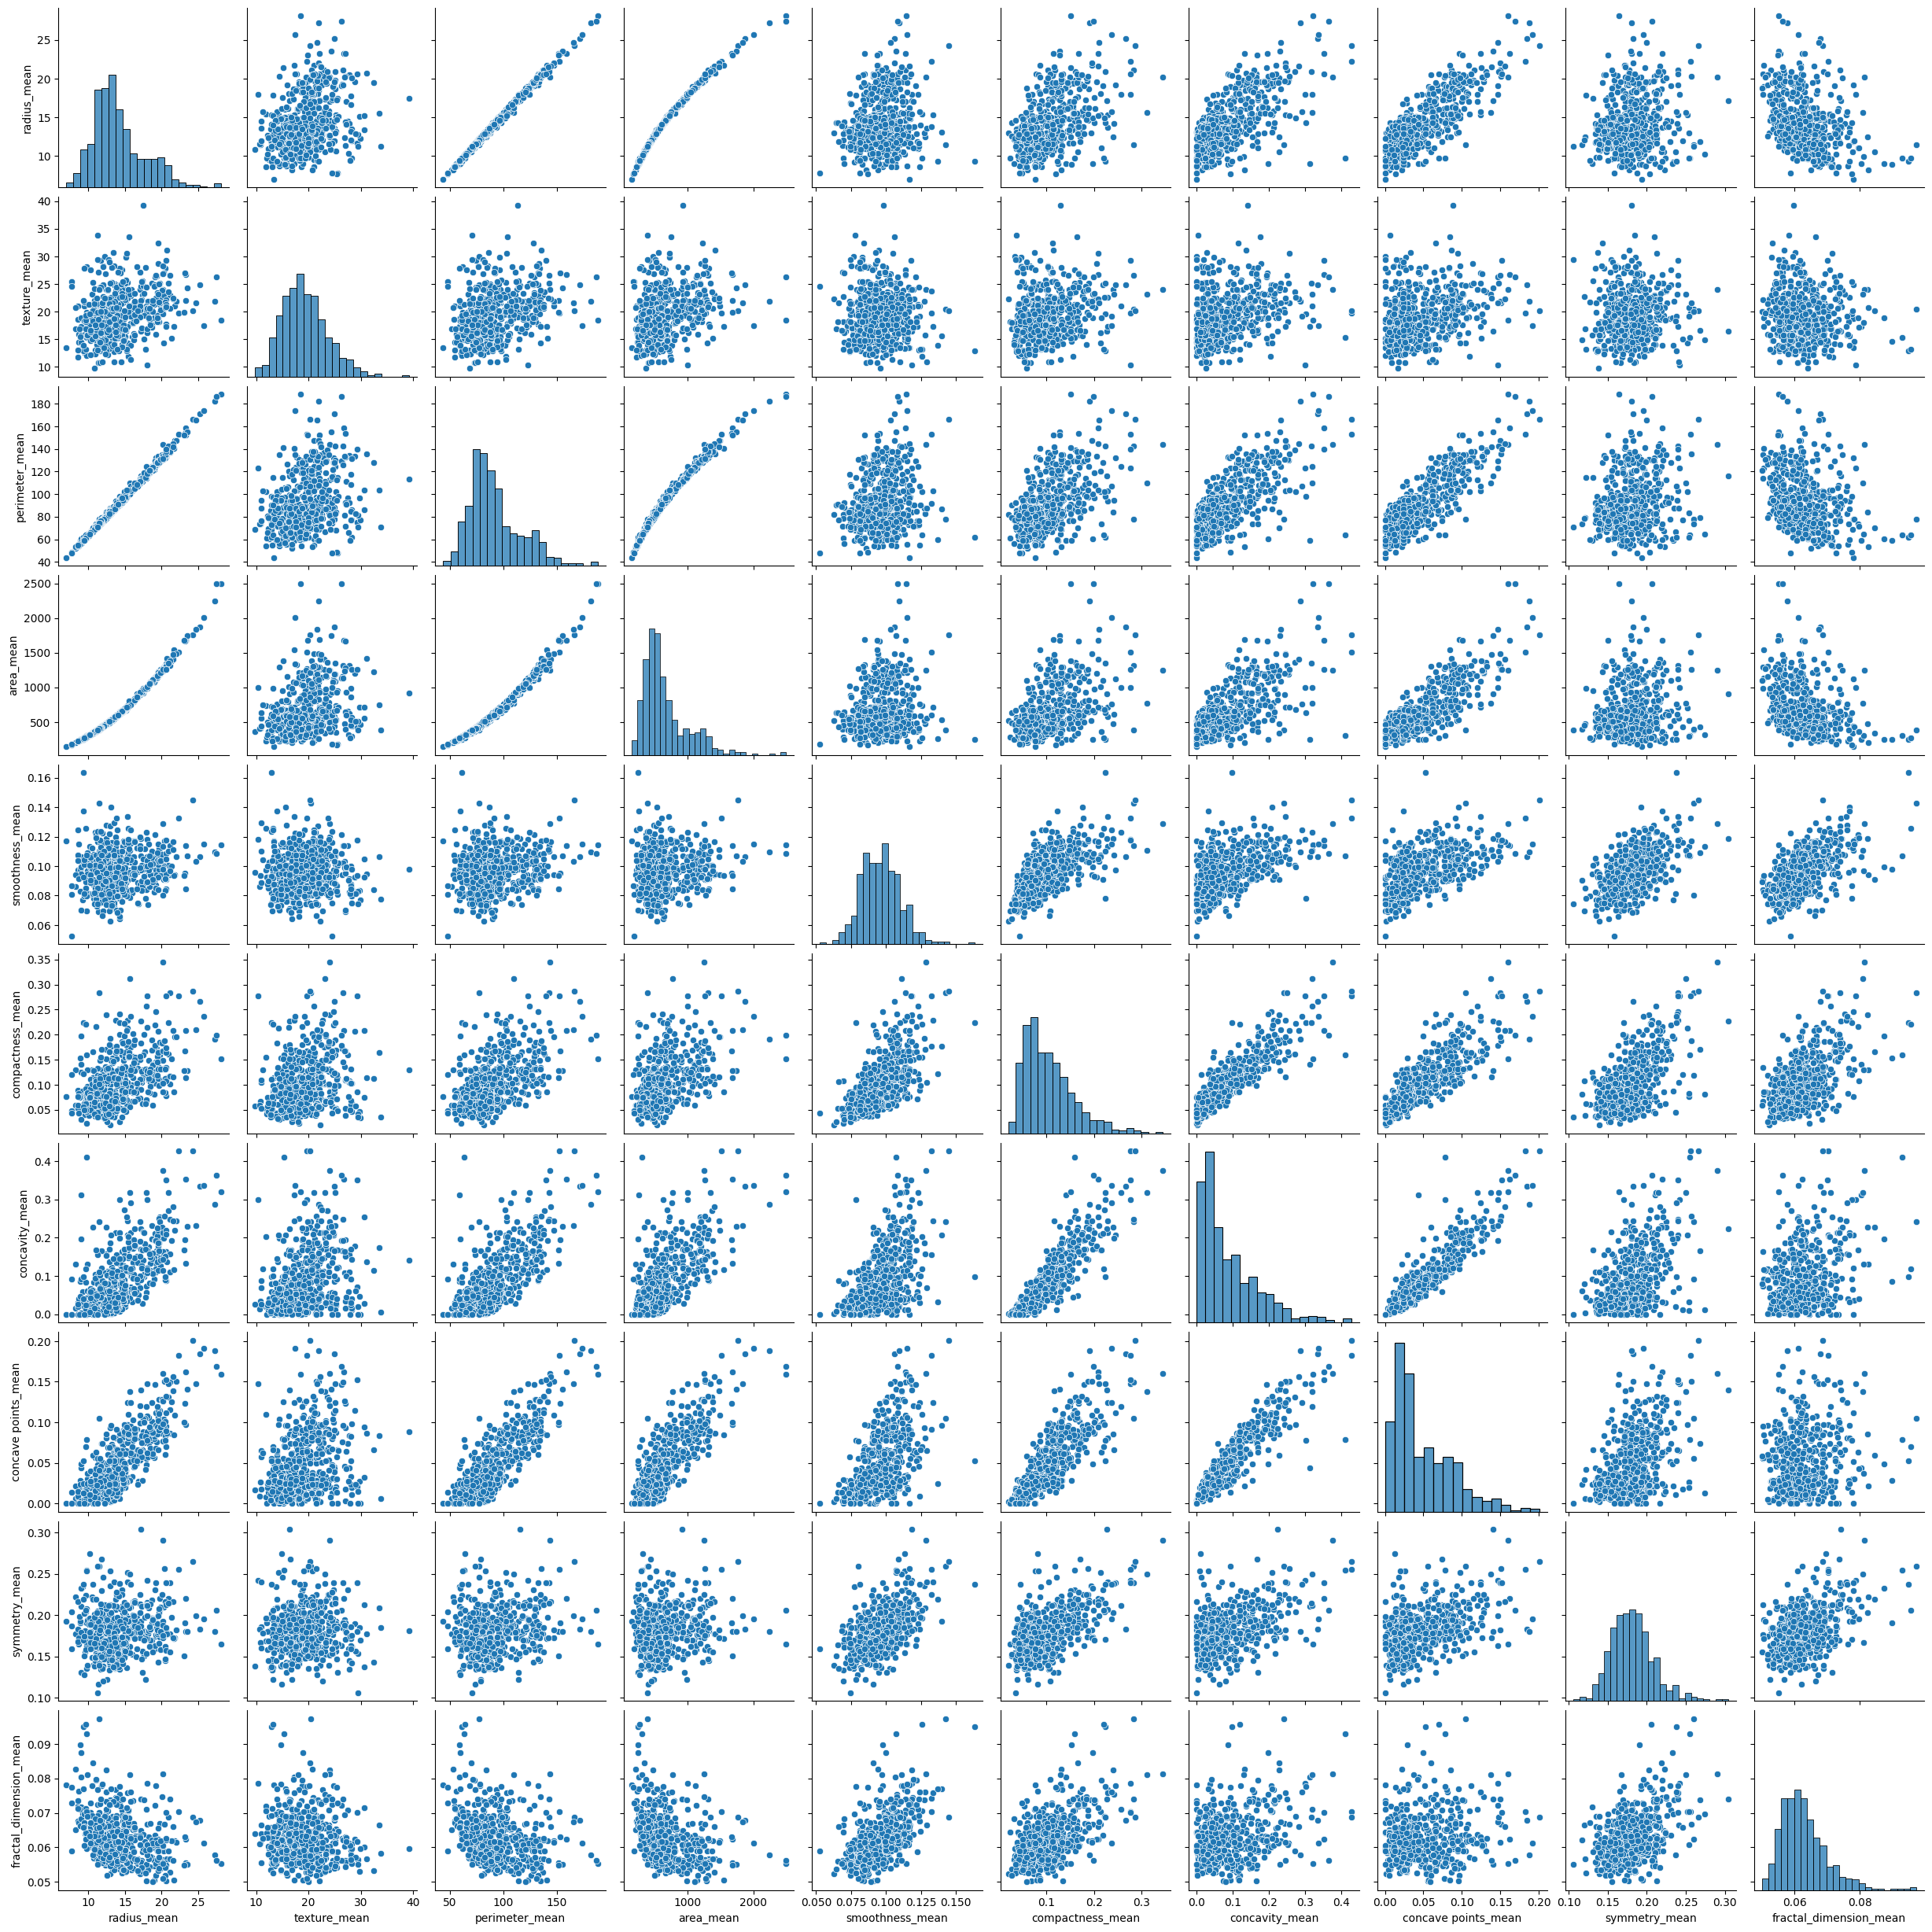

In [143]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


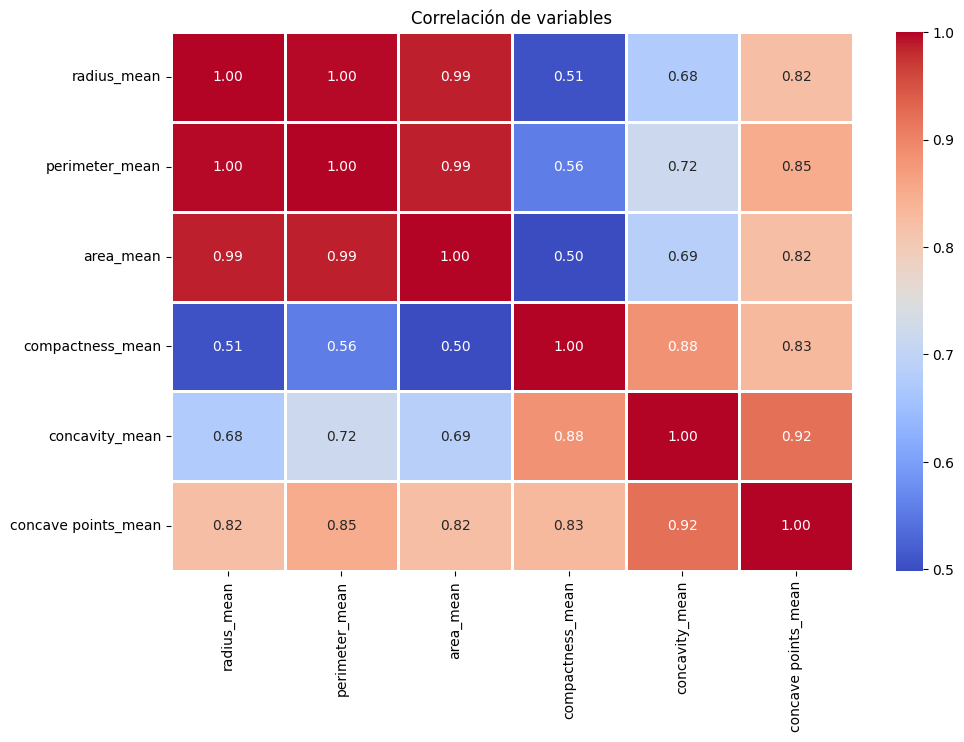

In [144]:
corre = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
corre_graf = data_df[corre].corr()

plt.figure(figsize=(11, 7))

sns.heatmap(corre_graf, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlación de variables')
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [145]:
columns = data_df.columns
columns_to_remove = np.concatenate((
    columns[columns.str.startswith('perimeter')],
    columns[columns.str.startswith('area')],
    columns[columns.str.startswith('concavity')],
    columns[columns.str.startswith('concave points')],
    ['diagnosis']
))
data_df = data_df.drop(columns = columns_to_remove)
print(f"columnas restantes: {len(data_df.columns)}")
print(f"valores: {data_df.columns}")

columnas restantes: 12
valores: Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

-----

**Columnas con skew() > 1**
1. compactness_mean
2. fractal_dimension_mean
3. radius_se
4. texture_se
5. smoothness_se
6. compactness_se
7. symmetry_se
8. fractal_dimension_se

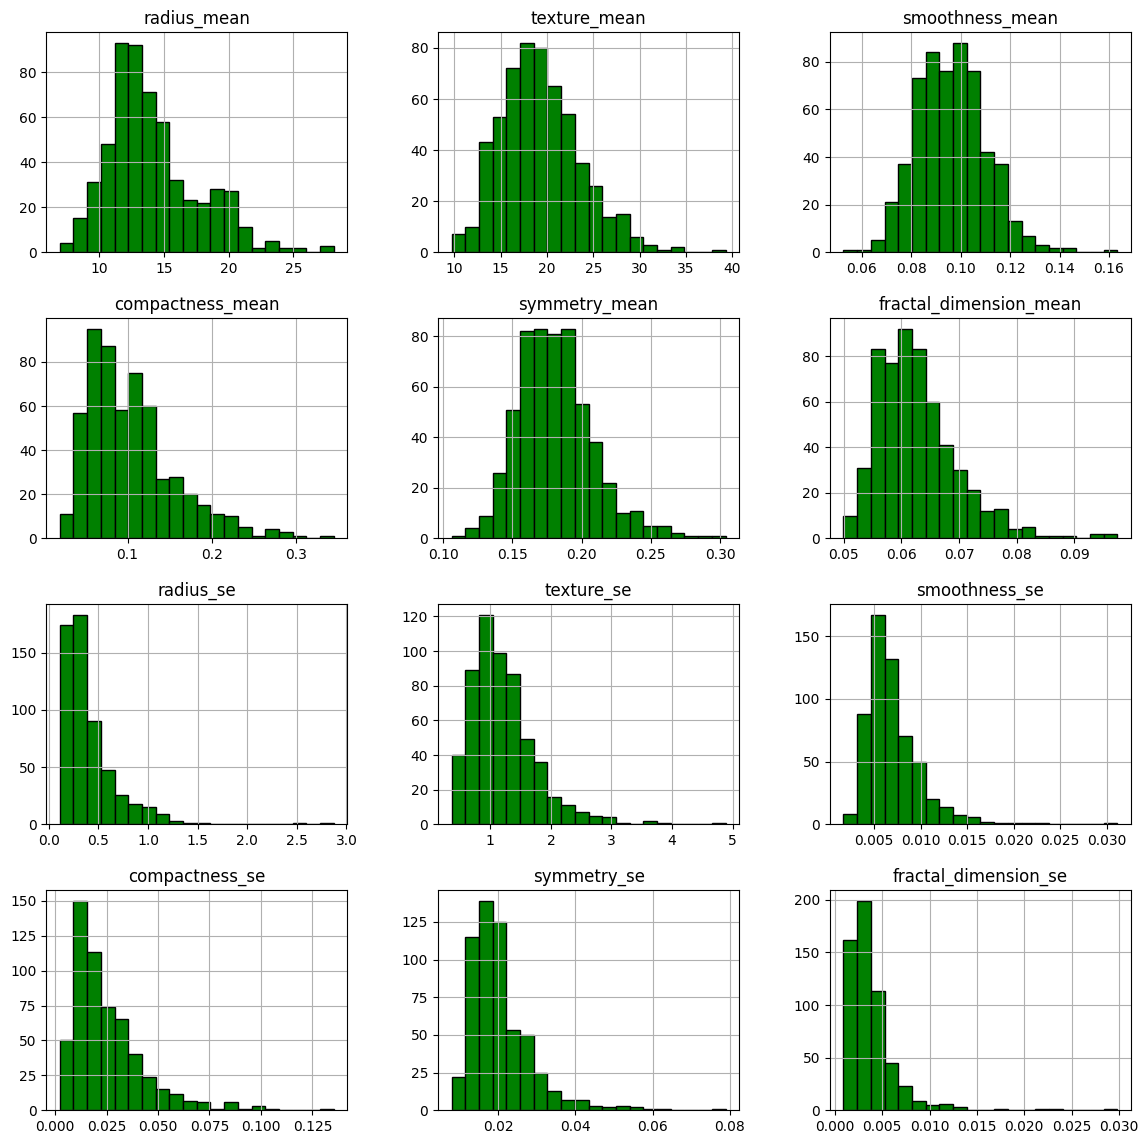

In [146]:
data_df.hist(bins=20, figsize=(14, 14), color='g', edgecolor='black')
plt.tight_layout
plt.show()

In [147]:
skew_cols = data_df.columns[data_df.skew() > 1]
print(f"Columnas con sesgo positivo mayor a 1: {skew_cols}")

Columnas con sesgo positivo mayor a 1: Index(['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]

-----

**Columnas fuera del intervalo [0, 1]**
1. radius_mean
2. texture_mean
3. radius_se
4. texture_se


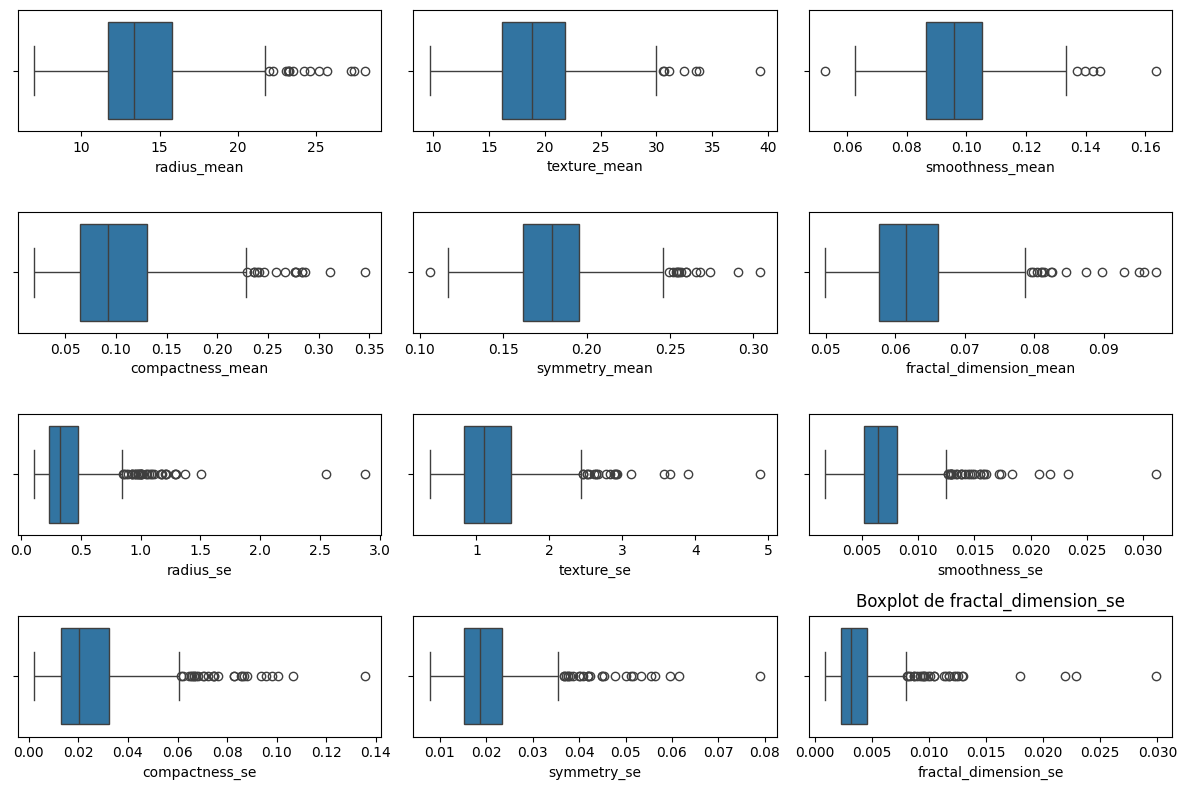

In [148]:
variables_numericas = data_df.columns
fig, axes = plt.subplots(4, 3, figsize=(12, 8))
for ax, col in zip(axes.flatten(), variables_numericas):
    sns.boxplot(x=data_df[col], ax=ax)
    plt.title(f"Boxplot de {col}")

plt.tight_layout()

In [149]:
scale_cols = data_df.columns[(data_df.min() < 0).values | (data_df.max() > 1).values]
print("Columnas fuera del intervalo [0, 1]:", scale_cols)

Columnas fuera del intervalo [0, 1]: Index(['radius_mean', 'texture_mean', 'radius_se', 'texture_se'], dtype='object')


Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [150]:
data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)

In [151]:
X = data_df.drop(columns=['diagnosis'])
y = data_df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1,
    # usamos stratify para intentar obtener muestras más parejas
    stratify=y
)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño X_test: {X_test.shape}")
print(f"Tamaño y_train: {y_train.shape}")
print(f"Tamaño y_test: {y_test.shape}")

Tamaño de X_train: (455, 30)
Tamaño X_test: (114, 30)
Tamaño y_train: (455,)
Tamaño y_test: (114,)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [152]:
columns = X.columns
columns_to_remove = np.unique(
  np.concatenate((
      columns[columns.str.startswith('perimeter')],
      columns[columns.str.startswith('area')],
      columns[columns.str.startswith('concavity')],
      columns[columns.str.startswith('concave points')],
      columns[columns.str.endswith('_worst')]
  ))
)
print(f"columnas a remover {len(columns_to_remove)}")
print(f"valores: {columns_to_remove}")

preprocessing = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_remove)
    ],
    remainder='passthrough'
)
preprocessing

columnas a remover 18
valores: ['area_mean' 'area_se' 'area_worst' 'compactness_worst'
 'concave points_mean' 'concave points_se' 'concave points_worst'
 'concavity_mean' 'concavity_se' 'concavity_worst'
 'fractal_dimension_worst' 'perimeter_mean' 'perimeter_se'
 'perimeter_worst' 'radius_worst' 'smoothness_worst' 'symmetry_worst'
 'texture_worst']


ColumnTransformer(remainder='passthrough',
                  transformers=[('drop_columns', 'drop',
                                 array(['area_mean', 'area_se', 'area_worst', 'compactness_worst',
       'concave points_mean', 'concave points_se', 'concave points_worst',
       'concavity_mean', 'concavity_se', 'concavity_worst',
       'fractal_dimension_worst', 'perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'radius_worst', 'smoothness_worst',
       'symmetry_worst', 'texture_worst'], dtype=object))])

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [153]:
def print_metrics(y_pred):
  conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label='M')
  recall = recall_score(y_test, y_pred, pos_label='M')
  print("Matriz de confusión:")
  print(conf_matrix)
  print()
  print(f"Exactitud (Accuracy): {accuracy:.4f}")
  print(f"Precisión (Precision): {precision:.4f}")
  print(f"Sensibilidad (Recall): {recall:.4f}")

In [154]:
logr_model = make_pipeline(
    preprocessing,
    LogisticRegression()
)

logr_model.fit(X_train, y_train)
y_pred = logr_model.predict(X_test)

print_metrics(y_pred)

Matriz de confusión:
[[70  2]
 [ 7 35]]

Exactitud (Accuracy): 0.9211
Precisión (Precision): 0.9459
Sensibilidad (Recall): 0.8333


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [155]:
preprocessing2 = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_remove),
        ('remove_skew', FunctionTransformer(np.sqrt), skew_cols),
        ('minmax', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)
preprocessing2

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop_columns', 'drop',
                                 array(['area_mean', 'area_se', 'area_worst', 'compactness_worst',
       'concave points_mean', 'concave points_se', 'concave points_worst',
       'concavity_mean', 'concavity_se', 'concavity_worst',
       'fractal_dimension_worst', 'perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'radius_worst', 'smoot...
       'symmetry_worst', 'texture_worst'], dtype=object)),
                                ('remove_skew',
                                 FunctionTransformer(func=<ufunc 'sqrt'>),
                                 Index(['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')),
                                ('minmax', MinMaxScaler(),
                                 Index(['radius_mean', 'texture_mean', 'radius_se', 'texture_se'], dtype='object'))])

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [156]:
logr_model2 = make_pipeline(
    preprocessing2,
    LogisticRegression()
)

logr_model2.fit(X_train, y_train)
y_pred2 = logr_model2.predict(X_test)

print_metrics(y_pred2)

Matriz de confusión:
[[72  0]
 [ 8 34]]

Exactitud (Accuracy): 0.9298
Precisión (Precision): 1.0000
Sensibilidad (Recall): 0.8095


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [157]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

- **Se necesitan 17 componentes para explicar el 99% de la varianza**

In [158]:
pca = PCA(n_components=.99)
X_pca = pca.fit_transform(X_scaled)
componentes = len(X_pca[0])
componentes
print(f"Se necesitan {componentes} componentes para explicar el 99% de la varianza")

# opción sin el parámetro n_components
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)
# varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
# componentes = np.argmax(varianza_acumulada >= 0.99) + 1
# print(f"Se necesitan {componentes} componentes para explicar el 99% de la varianza")

Se necesitan 17 componentes para explicar el 99% de la varianza


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [159]:
logr_model3 = make_pipeline(
  StandardScaler(),
  PCA(n_components=.99),
  LogisticRegression()
)

logr_model3.fit(X_train, y_train)
y_pred3 = logr_model3.predict(X_test)
print_metrics(y_pred3)

Matriz de confusión:
[[71  1]
 [ 1 41]]

Exactitud (Accuracy): 0.9825
Precisión (Precision): 0.9762
Sensibilidad (Recall): 0.9762


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

**RESPUESTA**

En modelos con fines médicos como la detección de cácer (o alguna otra enferemedad grave), la métricas más importante sería el `Recall`. La razón es para asegurar que no existan falsos negativos, ya que esto puede llegar a ser mortal.
- Es mejor alertar a un paciente de la posibilidad de tener cáncer y después de más estudios darse cuenta que no es cáncer, a decirle a alguien que no tiene cáncer cuando en realidad si lo tiene.

Si lo que queremos es mejorar nuestro `recall` tendríamos que reducir nuestro `threshold`, ya que eso haria que nuestra clase positiva sea detectada en una mayor cantidad de muestras.

In [160]:
# ejemplo práctico para demostrar el ajuste del threshold
def print_results(y_pred, threshold):
  print(f"T: {threshold:.1f}, P: {precision_score(y_test, y_pred, pos_label='M'):.2f}, R: {recall_score(y_test, y_pred, pos_label='M'):.2f}, A: {accuracy_score(y_test, y_pred):.2f}")

def test_thresholds(logr_model):
  logr_model.fit(X_train, y_train)
  y_probs = logr_model.predict_proba(X_test)[:, 1]

  thresholds = np.arange(0.1, 1, step=.1)
  for custom_threshold in thresholds:
    y_pred = (y_probs >= custom_threshold)
    y_pred = np.where(y_pred, 'M', 'B')
    print_results(y_pred, custom_threshold)

logr_model_base = make_pipeline(
    preprocessing2,
    LogisticRegression()
)

logr_model_pca = make_pipeline(
  StandardScaler(),
  PCA(n_components=.99),
  LogisticRegression()
)

print('base model')
test_thresholds(logr_model_base)
print('pca model')
test_thresholds(logr_model_pca)

base model
T: 0.1, P: 0.47, R: 1.00, A: 0.58
T: 0.2, P: 0.69, R: 0.95, A: 0.82
T: 0.3, P: 0.89, R: 0.93, A: 0.93
T: 0.4, P: 0.95, R: 0.90, A: 0.95
T: 0.5, P: 1.00, R: 0.81, A: 0.93
T: 0.6, P: 1.00, R: 0.67, A: 0.88
T: 0.7, P: 1.00, R: 0.55, A: 0.83
T: 0.8, P: 1.00, R: 0.45, A: 0.80
T: 0.9, P: 1.00, R: 0.31, A: 0.75
pca model
T: 0.1, P: 0.91, R: 0.98, A: 0.96
T: 0.2, P: 0.93, R: 0.98, A: 0.96
T: 0.3, P: 0.93, R: 0.98, A: 0.96
T: 0.4, P: 0.98, R: 0.98, A: 0.98
T: 0.5, P: 0.98, R: 0.98, A: 0.98
T: 0.6, P: 1.00, R: 0.95, A: 0.98
T: 0.7, P: 1.00, R: 0.95, A: 0.98
T: 0.8, P: 1.00, R: 0.90, A: 0.96
T: 0.9, P: 1.00, R: 0.88, A: 0.96
